## 创建Excel文件

In [4]:
import pandas as pd

df =pd.DataFrame({'id':[1,2,3],'name':['zs','ls','ww']})

# 默认会有索引,将ID列设置成索引,会返回一个新的df,
# 如果想要在原来的df上修改需要添加参数inplace=True
#  pandas提供了一个方法叫to_excel 存为excel

df = df.set_index('id')   #这行命令,让id这列成了索引列,若不加,将有一列索引,一列id

df.to_excel('./output-rs.xlsx')
print('end')

end


## 使用pandas读取文件

In [9]:
# 2.使用pandas读取文件
import pandas as pd

# 此处需要依赖xlrd库
people= pd.read_excel('./data/People.xlsx')


In [10]:
print('获取文件中行和列',people.shape)
print('huoqu文件中列名',people.columns)

获取文件中行和列 (19972, 6)
huoqu文件中列名 Index(['ID', 'Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')


In [14]:
# 默认取前五航,默认取后五行
print('获取文件中的前几行数据信息\n',people.head())
print('获取文件中的后几行数据信息\n',people.tail())

获取文件中的前几行数据信息
    ID      Type Title FirstName MiddleName    LastName
0   1  Employee   NaN       Ken          J     Sánchez
1   2  Employee   NaN     Terri        Lee       Duffy
2   3  Employee   NaN   Roberto        NaN  Tamburello
3   4  Employee   NaN       Rob        NaN     Walters
4   5  Employee   Ms.      Gail          A    Erickson
获取文件中的后几行数据信息
           ID                 Type Title FirstName MiddleName    LastName
19967  20773  Individual Customer   NaN   Crystal        NaN         Guo
19968  20774  Individual Customer   NaN  Isabella          F  Richardson
19969  20775  Individual Customer   NaN   Crystal          S          He
19970  20776  Individual Customer   NaN   Crystal        NaN       Zheng
19971  20777  Individual Customer   NaN   Crystal        NaN          Hu


## 常见问题
###  读取的时候,默认会将第一行作为列名,我们可以修改

In [17]:
# 读取的时候,默认会将第一行作为列名,我们可以修改,注意header=1
people=pd.read_excel('./data/people1.xlsx',header =1)
print(people.columns)

Index(['ID', 'Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')


### 如果第一行或者其他行不满足我们的需求时,我们可以自定义
#### 第一种:设置header为None,会使用默认的1234

In [22]:
people=pd.read_excel('./data/people.xlsx',header =None)
print(people.columns)
print(people.head())

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')
    0         1      2          3           4           5
0  ID      Type  Title  FirstName  MiddleName    LastName
1   1  Employee    NaN        Ken           J     Sánchez
2   2  Employee    NaN      Terri         Lee       Duffy
3   3  Employee    NaN    Roberto         NaN  Tamburello
4   4  Employee    NaN        Rob         NaN     Walters


#### 第二种设置默认值

In [31]:
people=pd.read_excel('./data/people.xlsx',header =None)
people.columns=['ID1','TYPE1','Title1','FirstName1','MiddleName1','LastName1']
# print(people.columns)
print(people.head())

  ID1     TYPE1 Title1 FirstName1 MiddleName1   LastName1
0  ID      Type  Title  FirstName  MiddleName    LastName
1   1  Employee    NaN        Ken           J     Sánchez
2   2  Employee    NaN      Terri         Lee       Duffy
3   3  Employee    NaN    Roberto         NaN  Tamburello
4   4  Employee    NaN        Rob         NaN     Walters


### 看到行索引是01234,想用ID1来行索引

In [32]:
people.set_index('ID1',inplace=True)
print(people.head())
people.to_excel('./People1.xlsx')
print('end')

        TYPE1 Title1 FirstName1 MiddleName1   LastName1
ID1                                                    
ID       Type  Title  FirstName  MiddleName    LastName
1    Employee    NaN        Ken           J     Sánchez
2    Employee    NaN      Terri         Lee       Duffy
3    Employee    NaN    Roberto         NaN  Tamburello
4    Employee    NaN        Rob         NaN     Walters
end


####  注意在读取数据的时候,会将ID1右作为一列输出,所以可以在读取的时候用参数指定一下

In [36]:
people1=pd.read_excel('./People1.xlsx',index_col = 'ID1')

print(people1.head())

        TYPE1 Title1 FirstName1 MiddleName1   LastName1
ID1                                                    
ID       Type  Title  FirstName  MiddleName    LastName
1    Employee    NaN        Ken           J     Sánchez
2    Employee    NaN      Terri         Lee       Duffy
3    Employee    NaN    Roberto         NaN  Tamburello
4    Employee    NaN        Rob         NaN     Walters


#### 可以指定别的列作为索引列,并在后边删除这列

In [37]:
people1=pd.read_excel('./People1.xlsx',index_col = 'MiddleName1')

print(people1.head())

            ID1     TYPE1 Title1 FirstName1   LastName1
MiddleName1                                            
MiddleName   ID      Type  Title  FirstName    LastName
J             1  Employee    NaN        Ken     Sánchez
Lee           2  Employee    NaN      Terri       Duffy
NaN           3  Employee    NaN    Roberto  Tamburello
NaN           4  Employee    NaN        Rob     Walters


### 指定读表的哪个sheet
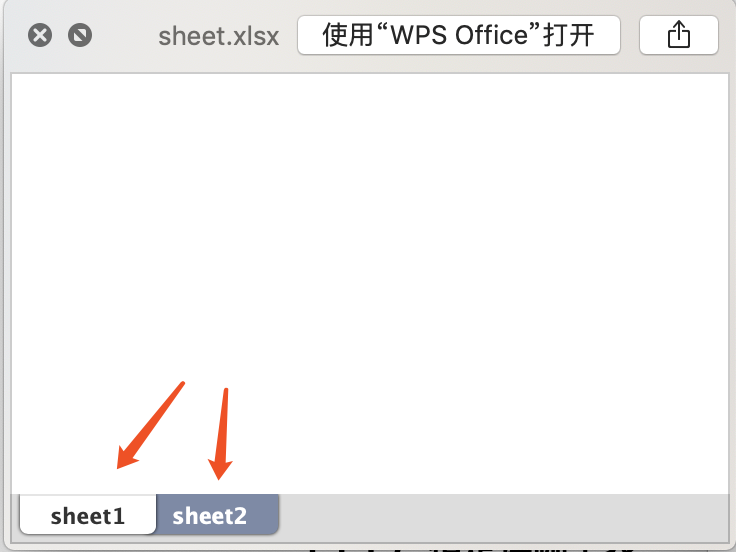

In [38]:
# sheet文件有两个sheet
sheet = pd.read_excel('./data/sheet.xlsx',sheet_name='sheet2')
print(sheet.head())

   ID  age
0   0   18
1   1   19


### 如果表格没有顶格写,怎么处理
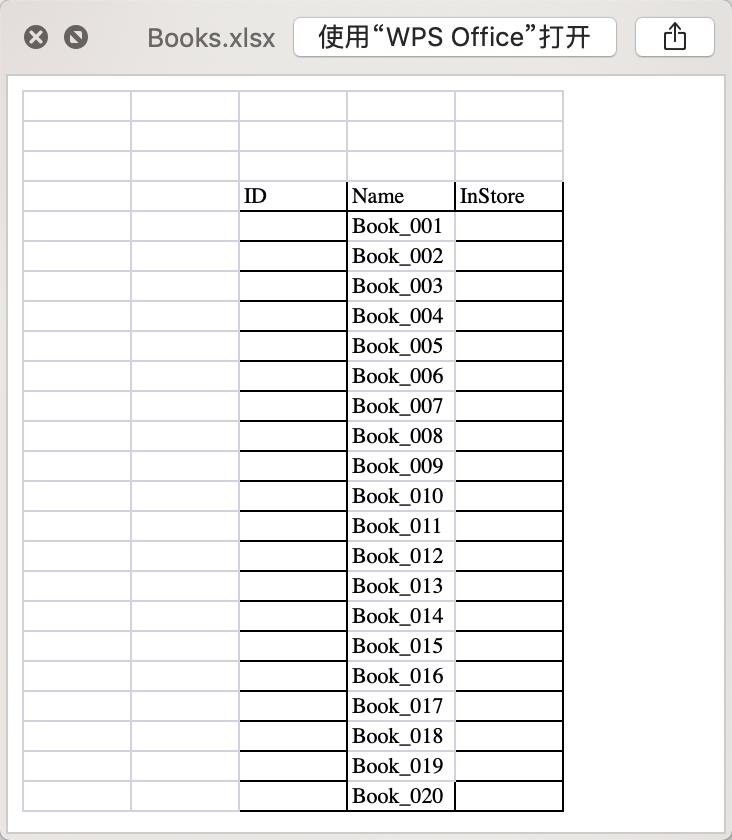

In [40]:
# skiprows: 跳过几行
# usecols: 使用那几列(C,指的就是Excel上的ABCD...)
book= pd.read_excel('./data/Books.xlsx',skiprows=3,usecols='C:F')
print(book.head())

   ID      Name  InStore
0 NaN  Book_001      NaN
1 NaN  Book_002      NaN
2 NaN  Book_003      NaN
3 NaN  Book_004      NaN
4 NaN  Book_005      NaN


### 自动填充内容
#### 方法1


In [42]:
import pandas as pd
book= pd.read_excel('./data/Books.xlsx',skiprows=3,usecols='C:F')
print(book['ID'])
book['ID']= [i+1 for i in book.index]
print(book['ID'])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: ID, dtype: float64
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: ID, dtype: int64


#### 方法2

In [43]:
#  修改ID的值
book['ID'].at[0] =1
print(book['ID'])

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: ID, dtype: int64


at 和 iat 函数只能选择某个未知的值,iat是按照行索引和列索引的位置来选择数据的.而at是按照行索引和列索引来选取数据;
at的使用方法与loc类似,但是比loc有更快的访问数据速度,而且只能访问单个元素,不能访问多个元素.
loc和iloc函数的功能包含at和iat函数的功能
#### 方法3

In [44]:
# 使用for循环给ID列添加内容
for i in book.index:
    book['ID'].at[i] = i+1
    
# 注意:添加后ID由于默认是float类型,修改一下类型
book['ID']= book['ID'].astype(int)
print(book['ID'])

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: ID, dtype: int64


### 给instore添加交换值


In [49]:
book['InStore']=['Yes' if i%2 == 0 else 'No' for i in book.index]
print(book['InStore'])

''' 和下方这块结果是一样的
book["inStore"]=book['InStore'].astype(str)
for  i in book.index:
    book['InStore'].at[i]='Yes' if i%2 ==0 else 'No'
'''
# print(book['InStore'])
book.set_index('ID',inplace=True)
book.to_excel('./books1.xlsx')

0     Yes
1      No
2     Yes
3      No
4     Yes
5      No
6     Yes
7      No
8     Yes
9      No
10    Yes
11     No
12    Yes
13     No
14    Yes
15     No
16    Yes
17     No
18    Yes
19     No
Name: InStore, dtype: object


### 函数填充计算列(有单价有数量,计算总价格)


In [55]:
import pandas as pd
books = pd.read_excel('./data/04Books.xlsx',index_col = 'ID')
print(books)

           Name  OnePrice  Count  Price
ID                                     
1   Product_001      9.82      5    NaN
2   Product_002     11.99      4    NaN
3   Product_003      9.62      6    NaN
4   Product_004     11.08      8    NaN
5   Product_005      7.75      3    NaN
6   Product_006      7.34      4    NaN
7   Product_007     10.97      6    NaN
8   Product_008     11.14      7    NaN
9   Product_009      8.98      2    NaN
10  Product_010      9.18      3    NaN
11  Product_011      8.31      4    NaN
12  Product_012      7.29      9    NaN
13  Product_013      8.36      5    NaN
14  Product_014      9.16      6    NaN
15  Product_015     10.31      3    NaN
16  Product_016     10.26      6    NaN
17  Product_017     11.95      8    NaN
18  Product_018     11.22      2    NaN
19  Product_019     10.95      4    NaN
20  Product_020      8.82      6    NaN


**上边的问题是没有总价**

In [56]:
# 计算总价
books['Price']=books['OnePrice']*books['Count']
print(books)

           Name  OnePrice  Count  Price
ID                                     
1   Product_001      9.82      5  49.10
2   Product_002     11.99      4  47.96
3   Product_003      9.62      6  57.72
4   Product_004     11.08      8  88.64
5   Product_005      7.75      3  23.25
6   Product_006      7.34      4  29.36
7   Product_007     10.97      6  65.82
8   Product_008     11.14      7  77.98
9   Product_009      8.98      2  17.96
10  Product_010      9.18      3  27.54
11  Product_011      8.31      4  33.24
12  Product_012      7.29      9  65.61
13  Product_013      8.36      5  41.80
14  Product_014      9.16      6  54.96
15  Product_015     10.31      3  30.93
16  Product_016     10.26      6  61.56
17  Product_017     11.95      8  95.60
18  Product_018     11.22      2  22.44
19  Product_019     10.95      4  43.80
20  Product_020      8.82      6  52.92


如果只想算某一段就可以使用循环迭代(就是单元格月单元格之间的操作)

In [57]:
for i in range(5,16):
    books['Price'].at[i]= books['OnePrice'].at[i]*books['Count'].at[i]
    
print(books)

           Name  OnePrice  Count  Price
ID                                     
1   Product_001      9.82      5  49.10
2   Product_002     11.99      4  47.96
3   Product_003      9.62      6  57.72
4   Product_004     11.08      8  88.64
5   Product_005      7.75      3  23.25
6   Product_006      7.34      4  29.36
7   Product_007     10.97      6  65.82
8   Product_008     11.14      7  77.98
9   Product_009      8.98      2  17.96
10  Product_010      9.18      3  27.54
11  Product_011      8.31      4  33.24
12  Product_012      7.29      9  65.61
13  Product_013      8.36      5  41.80
14  Product_014      9.16      6  54.96
15  Product_015     10.31      3  30.93
16  Product_016     10.26      6  61.56
17  Product_017     11.95      8  95.60
18  Product_018     11.22      2  22.44
19  Product_019     10.95      4  43.80
20  Product_020      8.82      6  52.92


写回到一个excel中

In [58]:
books.to_excel('./05Books.xlsx')

### 排序

In [59]:
import pandas as pd
books = pd.read_excel('./data/05List.xlsx')
print(books)

    ID         Name  Price  Buy
0    1  Product_001   9.82  Yes
1    2  Product_002  11.99  Yes
2    3  Product_003   9.62   No
3    4  Product_004  11.08  Yes
4    5  Product_005   7.75  Yes
5    6  Product_006   7.34   No
6    7  Product_007  10.97  Yes
7    8  Product_008  11.14  Yes
8    9  Product_009   8.98   No
9   10  Product_010   9.18  Yes
10  11  Product_011   8.31  Yes
11  12  Product_012   7.29   No
12  13  Product_013   8.36  Yes
13  14  Product_014   9.16  Yes
14  15  Product_015  10.31   No
15  16  Product_016  10.26  Yes
16  17  Product_017  11.95  Yes
17  18  Product_018  11.22   No
18  19  Product_019  10.95  Yes
19  20  Product_020   8.82  Yes


In [60]:
# 将价钱进行排序
'''
by = 'Price' : 根据哪一列进行排序
inplace = True :是否在原有的DataFrame上修改
ascending = True : 默认为升序
'''

books.sort_values(by='Price',inplace=True,ascending=False)
books

,ID,Name,Price,Buy
1,2,Product_002,11.99,Yes
16,17,Product_017,11.95,Yes
17,18,Product_018,11.22,No
7,8,Product_008,11.14,Yes
3,4,Product_004,11.08,Yes
6,7,Product_007,10.97,Yes
18,19,Product_019,10.95,Yes
14,15,Product_015,10.31,No
15,16,Product_016,10.26,Yes
0,1,Product_001,9.82,Yes


In [61]:
'''
by = ['Buy','Price'] : 先排Buy,再Price
inplace = True :是否在原有的DataFrame上修改
ascending = [True,False] : 分别指定buy和price的升序降序
'''
books.sort_values(by = ['Buy','Price'] ,inplace=True,ascending = [True,False])
books

,ID,Name,Price,Buy
17,18,Product_018,11.22,No
14,15,Product_015,10.31,No
2,3,Product_003,9.62,No
8,9,Product_009,8.98,No
5,6,Product_006,7.34,No
11,12,Product_012,7.29,No
1,2,Product_002,11.99,Yes
16,17,Product_017,11.95,Yes
7,8,Product_008,11.14,Yes
3,4,Product_004,11.08,Yes


## Pandas 链接数据库


In [79]:
import pandas as pd
import pymysql
# 不指定db是哪个
conn=pymysql.connect(host='localhost',user='root',password='jazzsolo',port=3306,charset='utf8')

query='show databases;'
# read_sql_query --传递连接数据库参数  query--SQL
# df --将数据库读取出来表转换成pd里边的数组
# read_excel 将excel里边表转化成数组--pd操作-切片\聚合\分组均可
print(type(conn))
df=pd.read_sql_query(query,conn)
print(df)

<class 'pymysql.connections.Connection'>
             Database
0          data_learn
1  information_schema
2             kaikeba
3               mysql
4  performance_schema
5                 sys


In [78]:
# 指定db是哪个,这里是kaikeba
conn=pymysql.connect(host='localhost',user='root',password='jazzsolo',port=3306,db='kaikeba',charset='utf8')

query='SELECT* FROM students'
# read_sql_query --传递连接数据库参数  query--SQL
# df --将数据库读取出来表转换成pd里边的数组
df=pd.read_sql_query(query,conn)
print(df)

    id name  age  height gender  cls_id               birth
0    1   小明   18   180.0      男       2                 NaT
1    2   小红   18   180.0      女       9 1993-12-31 23:59:59
2    3   小七   18   180.0      女       9 1993-12-31 23:59:59
3    4   阿甘   20   140.0      男       9 2018-12-31 23:59:59
4    5   李娜   18   166.0      女       9 2000-12-31 23:59:59
5    6   张张   15   180.0      男       9 1999-12-31 23:59:59
6    7  王二麻   24   181.0      男       9 1999-12-31 23:59:59
7    8  臭豆腐   43   133.0      男       9 1999-12-31 23:59:59
8    9  王力宏   55   165.0      男       9 1999-12-31 23:59:59
9   10  周杰伦   71   177.0      男       8 1999-12-31 23:59:59
10  11  吴彦祖   44   189.0      男       9 1999-12-31 23:59:59
11  12  林志玲   56   178.0      女       9 1999-12-31 23:59:59
12  13   小七   18   180.0      女       9 1993-12-31 23:59:59
13  14   阿甘   20   140.0      男       9 2018-12-31 23:59:59
14  15   李娜   18   166.0      女       9 2000-12-31 23:59:59
15  16   张张   15   180.0      男       9 